#  Comparison of different classification algorithms in diabetes recognition

## Import Libraries

In [196]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.ticker as mticker
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

## Load Dataset

In [147]:
filename ='/kaggle/input/diabetes-data-set/diabetes.csv'



## Summarize the Dataset

**Description of the features:** 
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [148]:
dataset.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [149]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [150]:
dataset.groupby('Outcome').size()

Outcome
0.0    500
1.0    268
dtype: int64

According to the table below from the reference article, only features like age, number of pregnancies, and DPF don't have any empty cells (blank). Whereas others do indeed have these cells and unfortunately, these are indicated with zeros, which makes it challenging to determine whether the real value is zero or not. To our advantage, among these features, only glucose could be equal to zero. We split our data set into two positive and negative groups to see how null values are distributed across these two groups.



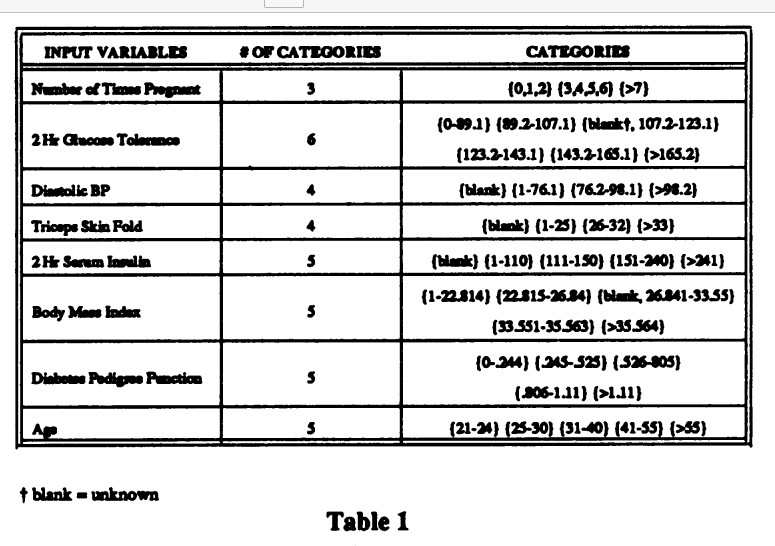

In [151]:
negative =dataset[dataset["Outcome"] == 0]
positive =dataset[dataset["Outcome"] == 1]

In [152]:
datasets= [dataset,negative,positive]
dataset_list =['totaldataset','negative-dataset','positive-dataset']
for i,j  in zip(range(len(dataset_list )), datasets):
   
    print('{0:3}'.format(dataset_list[i]))
    print('##########')
   
    for col in ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']:
             print(' {0:2} {1:3d} '.format(col,(j[col]==0).sum() ))
    print('\n')

totaldataset
##########
 Glucose   5 
 BloodPressure  35 
 SkinThickness 227 
 Insulin 374 
 BMI  11 


negative-dataset
##########
 Glucose   3 
 BloodPressure  19 
 SkinThickness 139 
 Insulin 236 
 BMI   9 


positive-dataset
##########
 Glucose   2 
 BloodPressure  16 
 SkinThickness  88 
 Insulin 138 
 BMI   2 




## Data Visualization

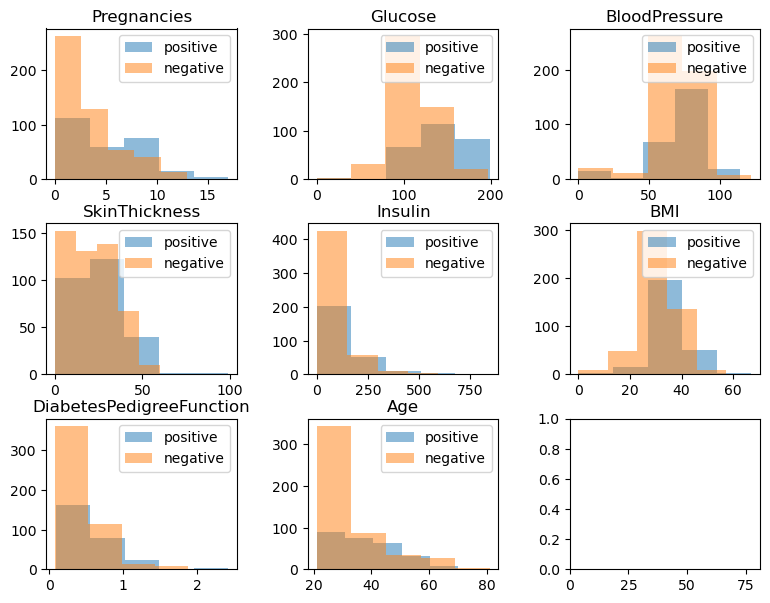

In [153]:
featues_withemptycells=['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 6))
fig.tight_layout()
axes = axes.ravel()
for idx,ax in enumerate(axes[0:8]):
    ax.set_title(dataset.columns[idx],pad=5)
    ax.hist(positive.iloc[:,idx],bins =5,alpha=0.5,label="positive")
    ax.hist(negative.iloc[:,idx], bins =5, alpha=0.5,label= 'negative')
    plt.xlim([0, max(dataset.iloc[:,idx])])
    ax.legend(loc='upper right')
    ax.set_title(dataset.columns[idx],pad=5)

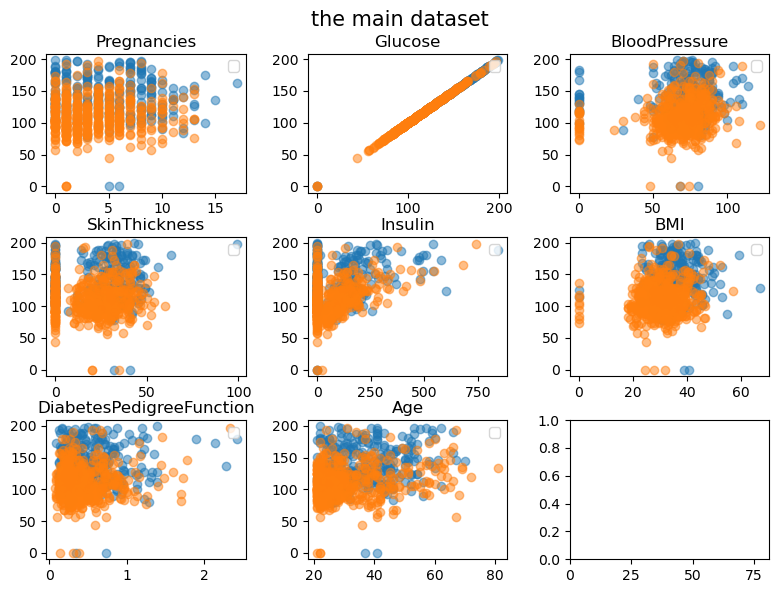

In [154]:
def scatter_plot(positive, negative, title): 
   fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 6))
   fig.subplots_adjust(hspace=0.4, top=2)
   fig.suptitle(title, fontsize=15)
   fig.tight_layout()
   axes = axes.ravel()
   for idx,ax in enumerate(axes[0:8]):
       ax.set_title(dataset.columns[idx],pad=5)
       ax.scatter(positive.iloc[:,idx], positive.iloc[:,1], marker='o',alpha= 0.5)
       ax.scatter(negative.iloc[:,idx], negative.iloc[:,1], marker='o', alpha= 0.5)
       plt.xlim([0, max(dataset.iloc[:,idx])])
       ax.legend(loc='upper right')
       ax.set_title(dataset.columns[idx],pad=5)
scatter_plot(positive, negative, 'the main dataset')

As previously stated, insulin and skin thickness have the greatest number of empty cells. Scatter plots also show these zeros.

## Using different strategies to replace the empty cells

**1) Removing all zero values**

In [155]:
dataset_removed_all_zeros = dataset[~(dataset.loc[:, dataset.columns != 'Outcome'] == 0).any(axis=1)]


**2) Replacing zero values with the mean of coulmn**

In [156]:
positive1 = positive.copy()
negative1 = negative.copy()
for data in [positive1, negative1]:
      for col in ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']:
        data[col]= data[col].replace(0,data[col].mean())
dataset_modified_based_column_mean = pd.concat([positive1,negative1]).sort_index()

**3) Replacing zeros with respect to the groups out of distribution division**

Here is a correlation matrix showing which features correlate best with the output, Insulin, and Skin thickness.

In [157]:
dataset.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


According to the correlation table and the number of empty cells in each column, glucose and BMI are the best features to use as the reference distribution when categorizing instances.

In [158]:
positive2 = positive.copy()
negative2 = negative.copy()
dataset_distribution = pd.concat([positive2,negative2]).sort_index()
df, x_bins=pd.cut(dataset_distribution['Glucose'], bins=10, include_lowest=True, labels =[i for i in range(10)],retbins=True)
dataset_distribution.insert(9, "Glucose_group", df, True)
df, y_bins=pd.cut(dataset_distribution['BMI'], bins=10, include_lowest=True, labels =[i for i in range(10)],retbins=True)
dataset_distribution.insert(10, "BMI_group", df, True)
dataset_distribution.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_group,BMI_group
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,7,5
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,4,3
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,9,3
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,4,4
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,6,6


**3a) With reference to the Glucose distribution**

In [160]:
dataset_distribution_Glucose= dataset_distribution.copy()
for col in ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']:
       #print(col)
       for i in range(10):
            dataset_distribution_Glucose.loc[(dataset_distribution_Glucose['Glucose_group']==i),col]\
            = dataset_distribution_Glucose.loc[(dataset_distribution_Glucose['Glucose_group']==i),col].replace(0,dataset_distribution_Glucose.loc\
            [(dataset_distribution_Glucose['Glucose_group']==i),col].mean())
            dataset_distribution_Glucose[col]= dataset_distribution_Glucose[col].replace(0,dataset_distribution_Glucose[col].mean())

**3b) With reference to the Glucose and BMI distributions**

In [162]:
dataset_distribution_Glucose_BMI= dataset_distribution.copy()
for col in ['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']:
       #print(col)
       for i in range(10):
           for j in range(10):
             dataset_distribution_Glucose_BMI.loc[(dataset_distribution_Glucose_BMI['Glucose_group']==i)&\
             (dataset_distribution_Glucose_BMI['BMI_group']==j),col]= dataset_distribution_Glucose_BMI.loc\
             [(dataset_distribution_Glucose_BMI['Glucose_group']==i)&(dataset_distribution_Glucose_BMI\
             ['BMI_group']==j),col].replace(0,dataset_distribution_Glucose_BMI.loc[(dataset_distribution_Glucose_BMI\
             ['Glucose_group']==i)&(dataset_distribution_Glucose_BMI['BMI_group']==j),col].mean())
             dataset_distribution_Glucose_BMI[col]= dataset_distribution_Glucose_BMI[col].replace(0,dataset_distribution_Glucose_BMI[col].mean())       
        

**Visualization of the modified data**

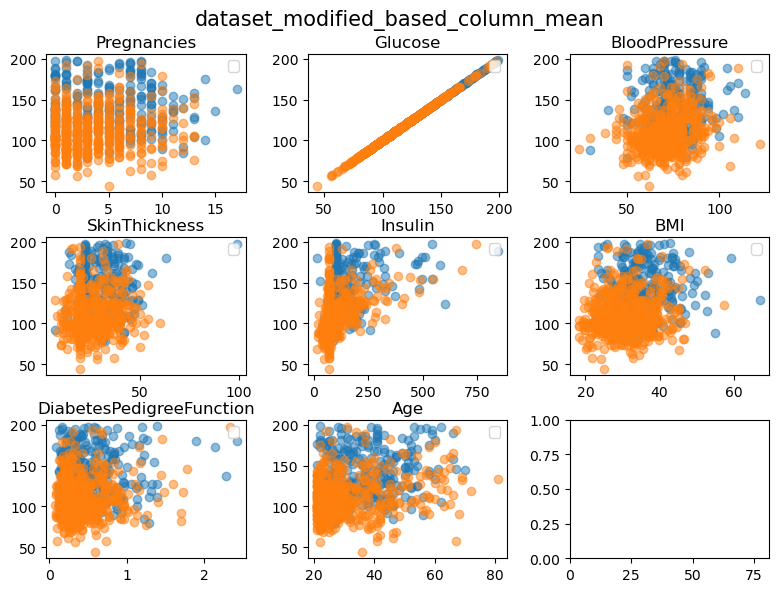

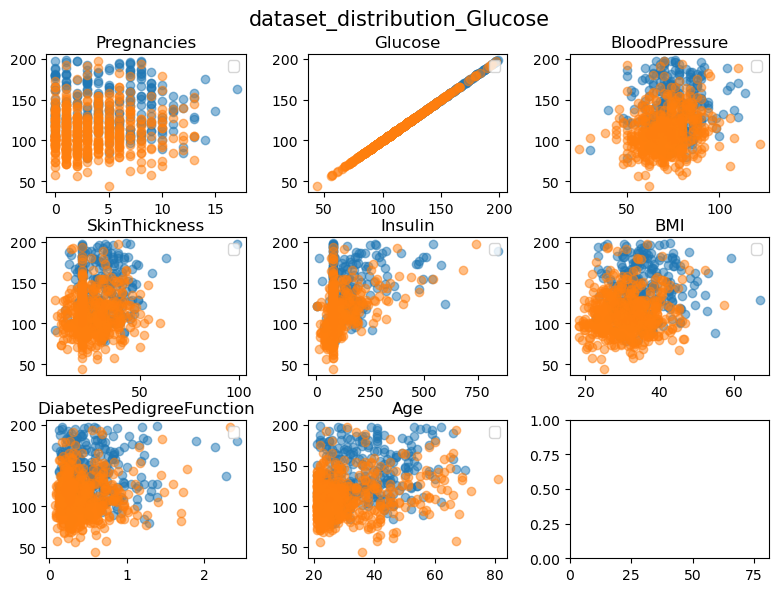

In [164]:
scatter_plot(dataset_modified_based_column_mean[dataset_modified_based_column_mean["Outcome"] == 1], dataset_modified_based_column_mean[dataset_modified_based_column_mean["Outcome"] == 0], 'dataset_modified_based_column_mean')
scatter_plot(dataset_distribution_Glucose[dataset_distribution_Glucose["Outcome"] == 1], dataset_distribution_Glucose[dataset_distribution_Glucose["Outcome"] == 0], 'dataset_distribution_Glucose')

## Evaluate Some Algorithms

**creation of validation dataset and build models**

In [165]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM',
SVC(gamma='auto'))])))

In [187]:
datasets= [dataset_removed_all_zeros,dataset_modified_based_column_mean,dataset_distribution_Glucose,dataset_distribution_Glucose_BMI]
data_list =['dataset_removed_all_zeros','dataset_modified_based_column_mean','dataset_distribution_Glucose','dataset_distribution_Glucose_BMI']
validation_size = 0.20
seed = 7
results_train = []
results_test=[]
for data , data_name in zip(datasets,data_list):
    print(data_name)
    print('#################')
    X = data.iloc[:, 0:8]
    Y = data.iloc[:,8]
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=30, random_state=seed, shuffle=True)
        cv_results = cross_validate(model, X, Y, cv=kfold, scoring='accuracy', return_train_score= True)
        results_train.append(cv_results['train_score'])
        results_test.append(cv_results['test_score'])
        names.append(name)
        msg1 = "The train accuray %s: %.2f (%.2f)" % (name, cv_results['train_score'].mean(), cv_results['train_score'].std())
        msg2 = "The test accuray %s: %.2f (%.2f)" % (name, cv_results['test_score'].mean(), cv_results['test_score'].std())
        msg3 = "The difference %s: %.2f (%.2f)" % (name, cv_results['train_score'].mean()-cv_results['test_score'].mean(), cv_results['train_score'].std()-cv_results['test_score'].std())
        print(msg1)
        print(msg2)
        print(msg3)

    print('-------------')


dataset_removed_all_zeros
#################
The train accuray ScaledLR: 0.79 (0.01)
The test accuray ScaledLR: 0.78 (0.12)
The difference ScaledLR: 0.01 (-0.11)
The train accuray ScaledLDA: 0.79 (0.01)
The test accuray ScaledLDA: 0.78 (0.14)
The difference ScaledLDA: 0.02 (-0.13)
The train accuray ScaledKNN: 0.83 (0.01)
The test accuray ScaledKNN: 0.76 (0.10)
The difference ScaledKNN: 0.07 (-0.10)
The train accuray ScaledCART: 1.00 (0.00)
The test accuray ScaledCART: 0.75 (0.12)
The difference ScaledCART: 0.25 (-0.12)
The train accuray ScaledNB: 0.78 (0.01)
The test accuray ScaledNB: 0.78 (0.14)
The difference ScaledNB: 0.01 (-0.13)
The train accuray ScaledSVM: 0.84 (0.01)
The test accuray ScaledSVM: 0.76 (0.13)
The difference ScaledSVM: 0.08 (-0.13)
-------------
dataset_modified_based_column_mean
#################
The train accuray ScaledLR: 0.77 (0.00)
The test accuray ScaledLR: 0.77 (0.07)
The difference ScaledLR: 0.00 (-0.07)
The train accuray ScaledLDA: 0.77 (0.00)
The test accur

## Selecting the best model and the best data set

As a result of our accuracy results, we selected the dataset where the null values are replaced with the mean of each column.

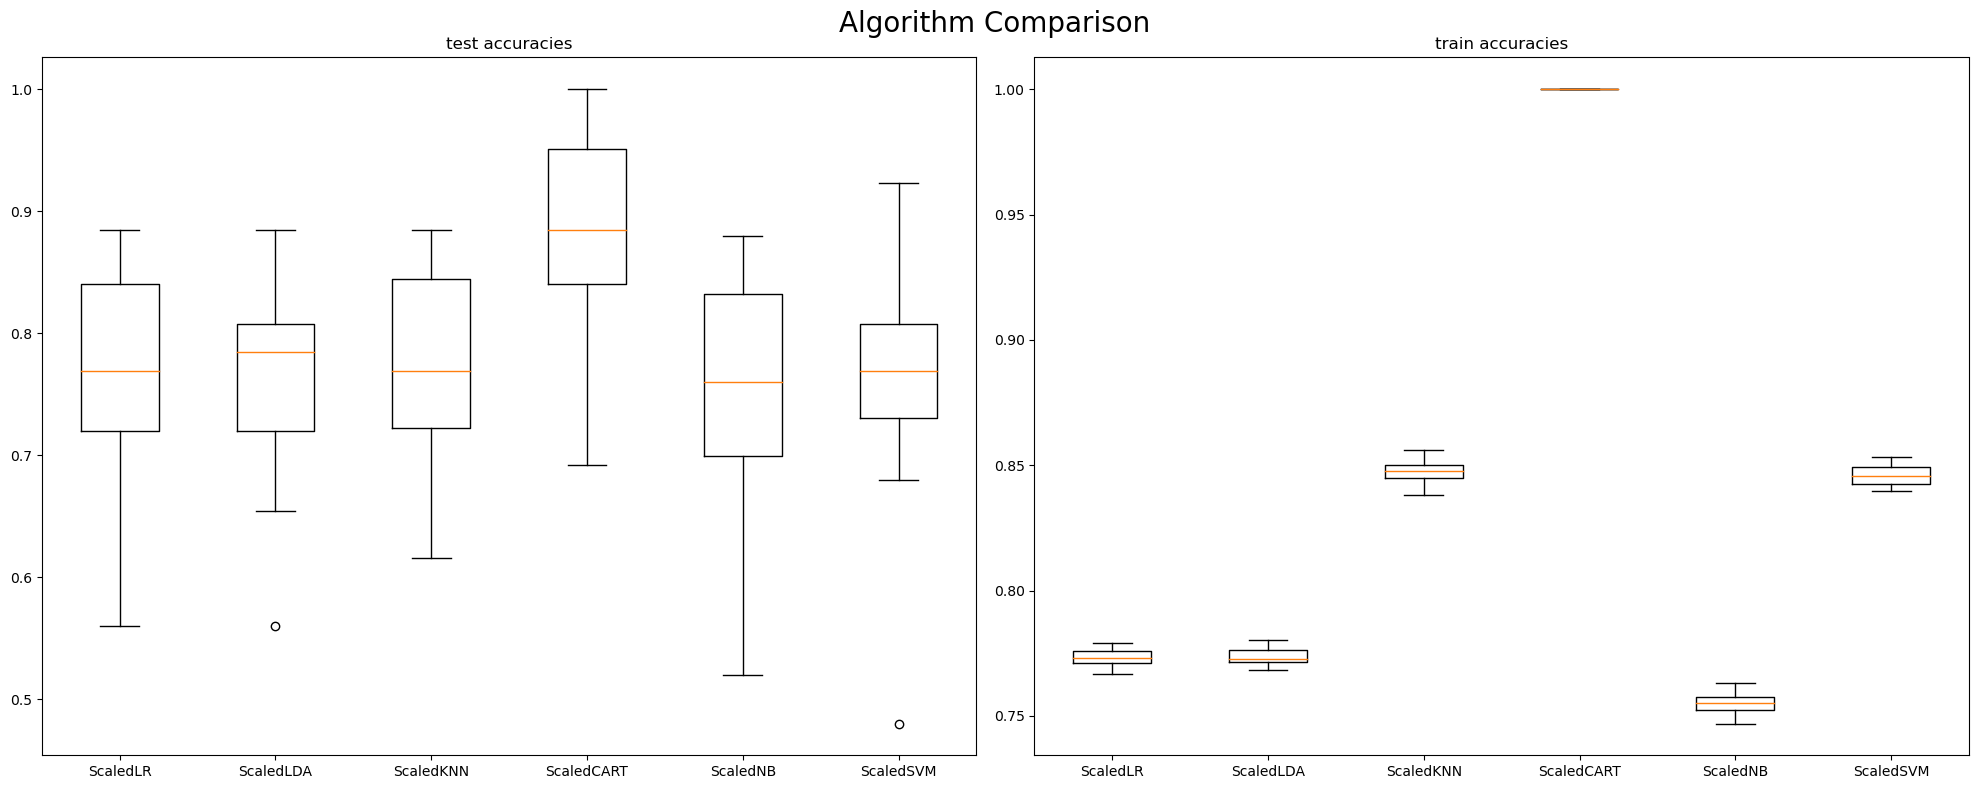

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.subplots_adjust(hspace=0.2, top=2)
fig.suptitle('Algorithm Comparison', fontsize=20)
fig.tight_layout()
axes[0].boxplot(results_test[6:12]  )
axes[1].boxplot(results_train[6:12])
axes[0].set_xticklabels(names)
axes[1].set_xticklabels(names)
axes[0].title.set_text('test accuracies')
axes[1].title.set_text('train accuracies')
plt.show()


We can see that CART(DecisionTreeClassifier) has both a tight distribution of error and has the highest score.

## Hyperparameter Tuning

In [189]:
space = {}
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [i for i in range(2,10,1)]
space['min_samples_leaf'] = [i for i in range(1,5,1)]
space['class_weight'] =[{0: 1, 1: 1}, {0: 0.65, 1: 0.35}]

In [192]:
X = dataset_modified_based_column_mean.iloc[:, 0:8]
Y = dataset_modified_based_column_mean.iloc[:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
                  test_size=validation_size, random_state=7)
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
search = GridSearchCV(model, space,  scoring='accuracy',  cv=kfold,return_train_score=True)
search_result = search.fit(rescaledX, Y_train)


In [193]:
print(search_result.best_index_)
print("Best option: using %s" % (search_result.best_params_))
print("The train accuray : %.3f (%.3f)" % ( search_result.cv_results_['mean_train_score'][search_result.best_index_], search_result.cv_results_['std_train_score'][search_result.best_index_]))
print("The test accuray : %.3f (%.3f)" % ( search_result.cv_results_['mean_test_score'][search_result.best_index_], search_result.cv_results_['std_test_score'][search_result.best_index_]))
print("The difference accuray : %.3f (%.3f)" % ( search_result.cv_results_['mean_train_score'][search_result.best_index_]-search_result.cv_results_['mean_test_score'][search_result.best_index_], search_result.cv_results_['std_train_score'][search_result.best_index_]-search_result.cv_results_['std_test_score'][search_result.best_index_]))

103
Best option: using {'class_weight': {0: 0.65, 1: 0.35}, 'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 9}
The train accuray : 0.969 (0.005)
The test accuray : 0.878 (0.037)
The difference accuray : 0.091 (-0.032)


In [ ]:
#for i in range(len(search_result.cv_results_['mean_train_score'])):
    #print("The train accuray : %.3f (%.3f)" % ( search_result.cv_results_['mean_train_score'][i], search_result.cv_results_['std_train_score'][i]))
    #print("The test accuray : %.3f (%.3f)" % ( search_result.cv_results_['mean_test_score'][i], search_result.cv_results_['std_test_score'][i]))
  #  print("The difference accuray : %.3f (%.3f)" % ( search_result.cv_results_['mean_train_score'][i]-search_result.cv_results_['mean_test_score'][i], search_result.cv_results_['std_train_score'][i]-search_result.cv_results_['std_test_score'][i]))

## Make Predictions

In [197]:
rescaledX_validation = scaler.transform(X_validation)
predictions = search.predict(rescaledX_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8766233766233766
[[91  6]
 [13 44]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        97
         1.0       0.88      0.77      0.82        57

    accuracy                           0.88       154
   macro avg       0.88      0.86      0.86       154
weighted avg       0.88      0.88      0.87       154

